In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [22]:
# Loading data
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df.shape

(150, 5)

In [25]:
# Descriptive statistics of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [27]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()


,Total,Percent
sepal length (cm),0,0.0
sepal width (cm),0,0.0
petal length (cm),0,0.0
petal width (cm),0,0.0
target,0,0.0


In [28]:
df.isnull().sum().max() # just checking that there's no missing data missing.

0

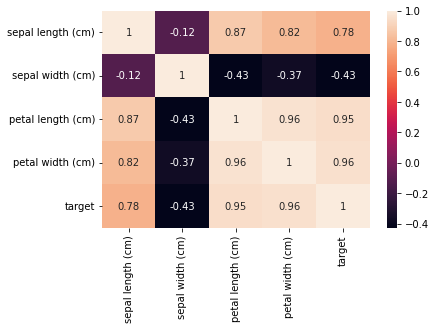

In [29]:
# Checking correlation of the data
corr = df.corr()
sns.heatmap(corr, annot=True)



In [30]:
# splitting the data

from sklearn.model_selection import train_test_split

X = df.drop(["target"], 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) # split the data 20% test and 80% train



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [32]:
# Train the modef
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
# prediction
y_pred = tree_clf.predict(X_test)

In [34]:
Predicted_data = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
Predicted_data.head()

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0



# Evaluate the model

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



seems we have overfit so we will take cross validation for better accuracy representation

In [42]:
# Using Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf, X, y, cv=5)
print(scores)

[0.96666667 0.96666667 0.9        0.96666667 1.        ]


In [43]:
# Average accuracy
np.mean(scores)

0.9600000000000002

### Confusion Matrix

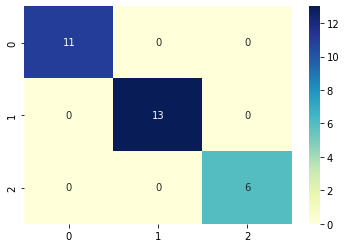

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu")
plt.show()

# Ploting the Decision Tree model

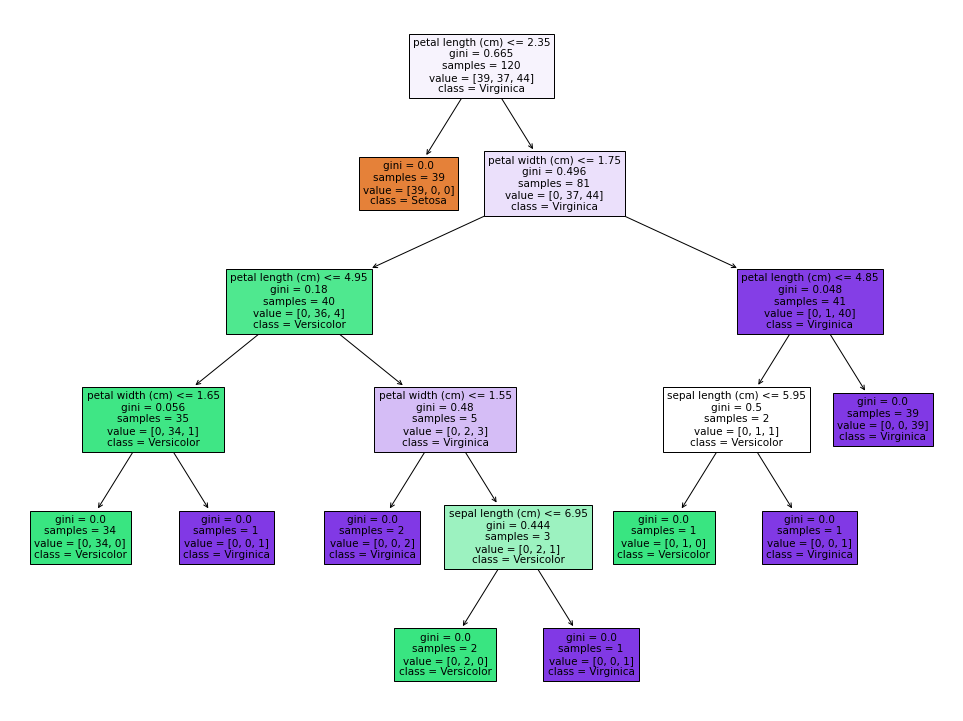

In [45]:
from sklearn.tree import plot_tree

features = X.columns
classes = ["Setosa", "Versicolor", "Virginica"]
plt.figure(figsize = (17,13))
plot_tree(tree_clf, feature_names = features, class_names = classes , filled = True)
plt.show()